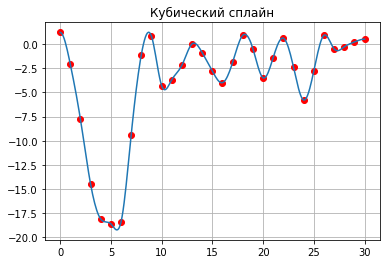

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from interp import spline

import csv
import collections

rows = []
with open('data/days.dat', newline='') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=' ', fieldnames=('index', 'year', 'month', 'day', 'tflag', 'tmin', 'qtmin', 'tmean', 'qtmean', 'tmax', 'qtmax', 'R', 'CR', 'QR'))
    for row in reader:
        rows.append(row)

knots = [i for i in range(len(rows))]
values = [float(row['tmean']) for row in rows]
x = np.arange(0.0, len(rows), 0.1)
f = spline.Spline().fit(knots, values, 0.0, 0.0).valuesx(x)

line1, = plt.plot(knots, values, 'ro', label="Заданные значения")
line2, = plt.plot(x, f, label="Интерполяция")

plt.grid(True)
plt.title("Кубический сплайн")
plt.show()

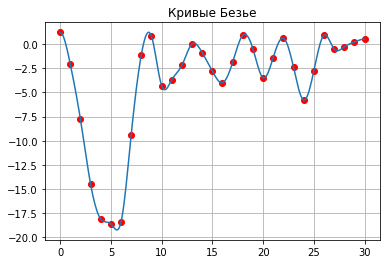

In [6]:
from interp import bezier

Bzr = bezier.Bezier().fit(knots, values, 0.0, 0.0) 
f = [Bzr.value(e) for e in x]

line1, = plt.plot(knots, values, 'ro', label="Заданные значения")
line2, = plt.plot(x, f, label="Интерполяция")

plt.grid(True)
plt.title("Кривые Безье")
plt.show()

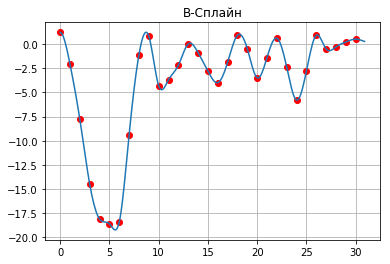

In [7]:
from interp import bspline

BSp = bspline.CubicBSpline().fit(knots, values, 0.0, 0.0)
f = [BSp.value(e) for e in x]

line1, = plt.plot(knots, values, 'ro', label="Заданные значения")
line2, = plt.plot(x, f, label="Интерполяция")

plt.grid(True)
plt.title("В-Сплайн")
plt.show()